## Novozymes Library Hackathon 2019

In [1]:
import nltk

In [2]:
#import sys
#!{sys.executable} -m pip install pyLDAvis

import pyLDAvis


In [3]:
import gensim

C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
import pandas as pd

In [5]:
biofilm2019 = pd.read_csv('biofilm2019_scopus.csv')
#biofilm2019 = biofilm2019.dropna()
#biofilm2019.head()
biofilm2019.tail()

,Authors,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Abstract,Author Keywords,Index Keywords
1889,"Quecan B.X.V., Santos J.T.C., Rivera M.L.C., H...",Effect of quercetin rich onion extracts on bac...,2019,Frontiers in Microbiology,10.0,APR,867,NaN,NaN,NaN,NaN,10.3389/fmicb.2019.00867,https://www.scopus.com/inward/record.uri?eid=2...,Quorum sensing (QS) regulates bacterial gene e...,Antimicrobial activity; Glycosylation; Onion; ...,NaN
1890,"Lomeli-Martinez S.M., Valentin-Goméz E., Varel...",Candida spp. Determination and Th1/Th2 mixed c...,2019,Frontiers in Immunology,10.0,JUN,1465,NaN,NaN,NaN,NaN,10.3389/fimmu.2019.01465,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Chronic periodontitis (CP), caused...",Candida spp; Chronic periodontitis; Cytokines;...,NaN
1891,"Chonova T., Kurmayer R., Rimet F., Labanowski ...",Benthic diatom communities in an alpine river ...,2019,Frontiers in Microbiology,10.0,APR,653,NaN,NaN,NaN,NaN,10.3389/fmicb.2019.00653,https://www.scopus.com/inward/record.uri?eid=2...,Freshwater ecosystems are continuously affecte...,Diatom communities; DNA metabarcoding; Functio...,NaN
1892,"Gildas Hounmanou Y.M., Leekitcharoenphon P., H...",Surveillance and Genomics of Toxigenic Vibrio ...,2019,Frontiers in Microbiology,10.0,APR,901,NaN,NaN,NaN,NaN,10.3389/fmicb.2019.00901,https://www.scopus.com/inward/record.uri?eid=2...,The occurrence of toxigenic Vibrio cholerae O1...,African Great Lakes; Aquatic reservoirs; Genom...,NaN
1893,"Zheng W.-H., Yu T., Luo Y.-H., Wang Y., Liu Y....",Clinical efficacy of gemcitabine and cisplatin...,2019,World Journal of Gastrointestinal Oncology,11.0,6,NaN,489,498,NaN,NaN,10.4251/wjgo.v11.i6.489,https://www.scopus.com/inward/record.uri?eid=2...,BACKGROUND Radical surgical resection is regar...,Biliary stent; Cisplatin; Gemcitabine; Hilar c...,NaN


In [ ]:
# to be used futher down in a function...
data = biofilm2019.Abstract.values.tolist()


In [6]:
# NLTK Stop words
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
#stop_words.extend(['biofilm'])

In [6]:
from gensim.parsing.preprocessing import remove_stopwords


# creating an empty list that will carry pre-processed entry-results
biofilm_list = []

for i in biofilm2019['Abstract']:
    j = remove_stopwords(i)

    tmp_list = gensim.utils.simple_preprocess (j)
    
    biofilm_list.append(tmp_list)

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
stop_words.extend(['biofilm'])

In [8]:
data_words = biofilm_list

In [9]:
#import sys
#!{sys.executable} -m pip install spacy 


In [10]:
#import sys 
#!{sys.executable} -m spacy download en_core_web_sm


In [12]:
import spacy

In [13]:
import re, numpy as np, pandas as pd
from pprint import pprint

In [14]:
# copy-pasted snippet from machine learning plus -- forming bi/tri-grams and excluding stopwords // https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/


# Gensim
import gensim#, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    #texts_out = []
    texts_out = texts
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    #for sent in texts:
    #    doc = nlp(" ".join(sent)) 
    #    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    #texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model_mlp = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=15,
                                           alpha='symmetric',
                                           iterations=150,
                                           per_word_topics=True)

pprint(lda_model_mlp.print_topics())

[(0,
  '0.040*"patients" + 0.022*"time" + 0.013*"treatment" + 0.013*"combined" + '
  '0.012*"observed" + 0.011*"interactions" + 0.010*"different" + 0.010*"based" '
  '+ 0.010*"surface" + 0.009*"specific"'),
 (1,
  '0.043*"strains" + 0.027*"virulence" + 0.022*"survival" + 0.021*"host" + '
  '0.020*"antimicrobial" + 0.019*"identified" + 0.016*"bacterial" + '
  '0.012*"pathogens" + 0.011*"drug" + 0.011*"positive"'),
 (2,
  '0.027*"distribution_reproduction" + 0.024*"cells" + 0.019*"cell" + '
  '0.018*"control" + 0.015*"open_access" + 0.015*"article_distributed" + '
  '0.015*"terms_creative" + 0.015*"commons_attribution" + 0.013*"levels" + '
  '0.013*"license_cc"'),
 (3,
  '0.020*"study" + 0.019*"group" + 0.019*"isolates" + 0.018*"resistance" + '
  '0.016*"strain" + 0.011*"vitro" + 0.011*"presence" + 0.010*"clinical" + '
  '0.010*"groups" + 0.009*"methods"'),
 (4,
  '0.021*"bacteria" + 0.015*"associated" + 0.013*"bacterial" + '
  '0.011*"potential" + 0.011*"samples" + 0.011*"species" + 0.0

In [19]:
#lda_model_mlp.save('lda_model_biofilm2019_mlp')
#ldamodel = gensim.models.LdaModel.load('lda_model_biofilm2019_mlp')


In [9]:
#from gensim import corpora

#dictionary = corpora.Dictionary(biofilm_list)
#corpus = [dictionary.doc2bow(text) for text in biofilm_list]

In [10]:
#NUM_TOPICS = 10
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [11]:
#import gensim
#ldamodel.save('lda_model_biofilm2019')
#ldamodel = gensim.models.LdaModel.load('lda_model_biofilm2019')


In [12]:
#topics = ldamodel.print_topics(num_words=10)
#for topic in topics:
#    print(topic)

(0, '0.011*"the" + 0.008*"biofilm" + 0.006*"bacteria" + 0.006*"in" + 0.005*"genes" + 0.005*"bacterial" + 0.004*"host" + 0.004*"cell" + 0.004*"cells" + 0.004*"formation"')
(1, '0.018*"biofilm" + 0.015*"the" + 0.014*"isolates" + 0.009*"strains" + 0.009*"resistance" + 0.007*"resistant" + 0.006*"formation" + 0.006*"study" + 0.005*"aeruginosa" + 0.005*"infections"')
(2, '0.012*"the" + 0.010*"biofilms" + 0.009*"biofilm" + 0.004*"bacterial" + 0.004*"results" + 0.003*"study" + 0.003*"formation" + 0.003*"we" + 0.003*"cell" + 0.003*"gmp"')
(3, '0.012*"the" + 0.011*"oral" + 0.009*"bacterial" + 0.008*"biofilm" + 0.006*"caries" + 0.006*"dental" + 0.005*"in" + 0.005*"study" + 0.004*"mutans" + 0.004*"results"')
(4, '0.013*"the" + 0.007*"biofilm" + 0.006*"strain" + 0.004*"in" + 0.004*"bacterial" + 0.004*"study" + 0.004*"formation" + 0.004*"this" + 0.003*"implant" + 0.003*"species"')
(5, '0.023*"biofilm" + 0.013*"formation" + 0.009*"the" + 0.008*"bacterial" + 0.007*"aeruginosa" + 0.007*"biofilms" + 0.0

In [16]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_mlp, corpus, dictionary=lda_model_mlp.id2word)
vis


C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.177125  0.252795       1        1  22.340662
3      0.198980 -0.140895       2        1  19.385548
0      0.091592 -0.156243       3        1  13.986439
5      0.055462  0.192840       4        1  11.388177
2      0.097424 -0.222590       5        1  10.667740
1      0.108376  0.051790       6        1  10.595390
8     -0.097782  0.066757       7        1   8.051972
7     -0.220973 -0.021438       8        1   2.079043
6     -0.209548 -0.013438       9        1   0.845512
9     -0.200656 -0.009577      10        1   0.659525, topic_info=      Category         Freq                       Term        Total  loglift  \
term                                                                           
915    Default  1393.000000                    strains  1393.000000  30.0000   
962    Default  1447.000000                   patients  1447.000000  29.0000   
36     Default   667.000000                      genes   667.000000  28.0000   
119    Default  1492.000000                   bacteria  1492.000000  27.0000   
10317  Default   673.000000  distribution_reproduction   673.000000  26.0000   
347    Default   670.000000                  virulence   670.000000  25.0000   
392    Default   687.000000                 infections   687.000000  24.0000   
4      Default   872.000000                   activity   872.000000  23.0000   
665    Default   671.000000                  infection   671.000000  22.0000   
38     Default   863.000000                      group   863.000000  21.0000   
190    Default   716.000000                       time   716.000000  20.0000   
1120   Default   848.000000                   isolates   848.000000  19.0000   
105    Default   958.000000                  treatment   958.000000  18.0000   
485    Default   837.000000                 resistance   837.000000  17.0000   
122    Default   651.000000                      cells   651.000000  16.0000   
727    Default   541.000000                   proteins   541.000000  15.0000   
598    Default   747.000000                     strain   747.000000  14.0000   
95     Default  1038.000000                     showed  1038.000000  13.0000   
712    Default   531.000000                       host   531.000000  12.0000   
337    Default   569.000000                   survival   569.000000  11.0000   
428    Default   528.000000                significant   528.000000  10.0000   
206    Default   767.000000                 associated   767.000000   9.0000   
388    Default   524.000000                     higher   524.000000   8.0000   
1134   Default   550.000000              antimicrobial   550.000000   7.0000   
65     Default   227.000000                       oral   227.000000   6.0000   
278    Default  1320.000000                      study  1320.000000   5.0000   
310    Default   469.000000                 identified   469.000000   4.0000   
558    Default   466.000000                       cell   466.000000   3.0000   
618    Default   461.000000                    control   461.000000   2.0000   
207    Default  1508.000000                  bacterial  1508.000000   1.0000   
...        ...          ...                        ...          ...      ...   
1998   Topic10    39.034843                     phages    39.844898   5.0009   
547    Topic10    35.951199                     silver    36.761318   4.9991   
2000   Topic10    31.851408                   prophage    32.661552   4.9963   
773    Topic10    29.940762                  sequenced    30.751526   4.9947   
1146   Topic10    29.482393                        gut    30.292295   4.9943   
2406   Topic10    26.372000                      lytic    27.182056   4.9912   
2753   Topic10    21.740475              bacteriophage    22.550451   4.9848   
3283   Topic10    19.233877                        set    20.043869   4.9802   
1168   Topic10    18.680708  

In [24]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [25]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_mlp, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.4648,"genes, proteins, protein, production, expressi...","[periodontitis, chronic, inflammatory, disease..."
1,1,0.0,0.9219,"patients, time, treatment, combined, observed,...","[microbial_fuel, cells, mfcs, wastewater, trea..."
2,2,4.0,0.9581,"bacteria, associated, bacterial, potential, sa...","[plastics, released, environment, landfills, e..."
3,3,1.0,0.6915,"strains, virulence, survival, host, antimicrob...","[pseudomonas_aeruginosa, aeruginosa, aerobic, ..."
4,4,5.0,0.7682,"activity, infections, infection, showed, treat...","[complicated, issue, infectious, illnesses, th..."
5,5,3.0,0.4365,"study, group, isolates, resistance, strain, vi...","[osteomyelitis, difficult_treat, infective, bo..."
6,6,2.0,0.2710,"distribution_reproduction, cells, cell, contro...","[study, latex, azadirachta, indica, synthesis,..."
7,7,2.0,0.3532,"distribution_reproduction, cells, cell, contro...","[synthesis, metal, oxide_nanoparticles, plant,..."
8,8,2.0,0.6435,"distribution_reproduction, cells, cell, contro...","[bacterial, brown, stripe, bbs, economically, ..."
9,9,0.0,0.7292,"patients, time, treatment, combined, observed,...","[antibiotic, efficacy, antagonized, bioactive,..."


In [127]:
query_topic = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 8].sort_values(by=['Topic_Perc_Contrib'], ascending=False)[:10]

len(query_topic)


10

In [128]:
query_topic_list = query_topic['Document_No'].tolist()

In [129]:
biofilm2019.iloc[query_topic_list]

,Authors,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Abstract,Author Keywords,Index Keywords
1202,"Wang Y., Wang F., Wang C., Li X., Fu L.",Positive regulation of spoilage potential and biofilm formation in Shewanella baltica OS155 via ...,2019,Frontiers in Microbiology,10.0,FEB,135,NaN,NaN,NaN,1.0,10.3389/fmicb.2019.00135,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85065901858&doi=10.3389%2ffmicb.2019.00135&p...,The spoilage potential and biofilm formation of Shewanella baltica are reported to be regulated ...,Biofilm formation; Diketopiperazines; Orphan LuxR-type proteins; Quorum sensing; Spoilage,dipeptide; LuxR01 protein; LuxR02 protein; LuxR03 protein; LuxR05 protein; LuxR06 protein; trans...
0,"Leewananthawet A., Arakawa S., Okano T., Daitoku Kinoshita R., Ashida H., Izumi Y., Suzuki T.",Ozone ultrafine bubble water induces the cellular signaling involved in oxidative stress respons...,2019,Science and Technology of Advanced Materials,20.0,1,NaN,589,598,NaN,NaN,10.1080/14686996.2019.1614980,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85067284985&doi=10.1080%2f14686996.2019.1614...,Periodontitis is a chronic inflammatory disease caused by oral microorganisms in the subgingival...,211 Scaffold / Tissue engineering / Drug delivery; 30 Bio-inspired and biomedical materials; aqu...,Cell culture; Chemical activation; Diseases; Fibroblasts; Oxidative stress; Ozone; Proteins; RNA...
442,"Madonna S., Girolomoni G., Dinarello C.A., Albanesi C.",The significance of il-36 hyperactivation and il-36r targeting in psoriasis,2019,International Journal of Molecular Sciences,20.0,13,3318,NaN,NaN,NaN,NaN,10.3390/ijms20133318,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85069310707&doi=10.3390%2fijms20133318&partn...,"Psoriasis is an immune-mediated inflammatory skin disease that involves mainly T helper (Th)17, ...",IL-17; IL-36; IL-38; Psoriasis; Skin inflammation,anb019; B7 antigen; chemokine; cytokeratin 10; cytokine; gelatinase B; high mobility group B1 pr...
1321,"Kharadi R.R., Castiblanco L.F., Waters C.M., Sundin G.W.","Phosphodiesterase genes regulate amylovoran production, biofilm formation, and virulence in Erwi...",2019,Applied and Environmental Microbiology,85.0,1,e02233-18,NaN,NaN,NaN,2.0,10.1128/AEM.02233-18,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85058591753&doi=10.1128%2fAEM.02233-18&partn...,Cyclic di-GMP (c-di-GMP) is a ubiquitous bacterial second messenger molecule that is an importan...,Cyclic di-GMP; EAL domain; Exopolysaccharide; Fire blight; Flagellar motility; Levan,Biofilms; Enzymes; Esters; Genes; Cyclic di-GMP; EAL domain; Exopolysaccharides; Fire blight; Fl...
931,"Navarrete B., Leal-Morales A., Serrano-Ron L., Sarrió M., Jiménez-Fernández A., Jiménez-Díaz L.,...","Transcriptional organization, regulation and functional analysis of flhF and fleN in Pseudomonas...",2019,PLoS ONE,14.0,3,e0214166,NaN,NaN,NaN,NaN,10.1371/journal.pone.0214166,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85063283746&doi=10.1371%2fjournal.pone.02141...,The Pseudomonas putida flhA-flhF-fleN-fliA cluster encodes a component of the flagellar export g...,NaN,bacterial protein; guanosine phosphate; protein FleQ; synthetase; unclassified drug; Article; ba...
819,"El Halfawy N.M., El-Naggar M.Y., Andrews S.C.",Draft genome sequence of an enterococcus faecalis strain (24fs) that was isolated from healthy i...,2019,Microbiology Resource Announcements,8.0,13,e00047-19,NaN,NaN,NaN,NaN,10.1128/MRA.00047-19,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85064655816&doi=10.1128%2fMRA.00047-19&partn...,"Enterococcus faecalis 24FS is a bacteriocin-producing, multiply antibiotic-resistant, and potent...",NaN,bacteriocin; chloramphenicol; colicin; erythromycin; hemolysin; penicillin derivative; streptomy...
884,"Howard M.F., Renee Bina X., Bina J.E.",Indole inhibits ToxR regulon expression in Vibrio cholerae,2019,Infection and Immunity,87.0,3,e0077618,NaN,N

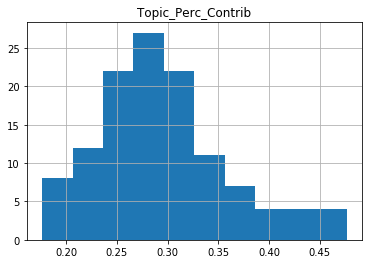

In [117]:
topic_df = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 8]
topic_perc_contrib = topic_df['Topic_Perc_Contrib']
topic_perc_contrib = pd.DataFrame(topic_perc_contrib)
topic_perc_contrib.head()
hist8 = pd.DataFrame.hist(topic_perc_contrib)



AttributeError: 'numpy.ndarray' object has no attribute 'spines'

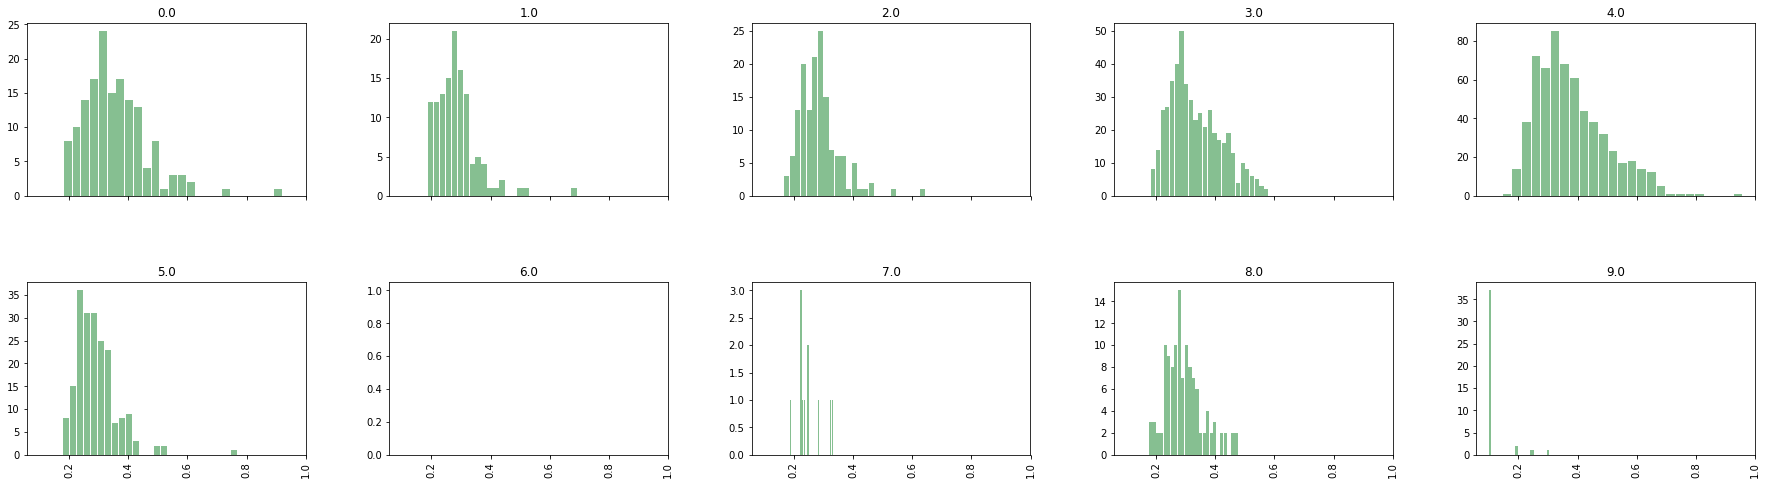

In [123]:
# snippet from: https://mode.com/example-gallery/python_histogram/

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


ax = df_dominant_topic.hist(column='Topic_Perc_Contrib', by='Dominant_Topic', bins=25, grid=False, figsize=(30,8), layout=(2,5), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Topic Perc Contrib", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Freq", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [26]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9219,"patients, time, treatment, combined, observed, interactions, different, based, surface, specific","[microbial_fuel, cells, mfcs, wastewater, treatment, fits, circular, economy, context, produce, ..."
1,1.0,0.6915,"strains, virulence, survival, host, antimicrobial, identified, bacterial, pathogens, drug, positive","[pseudomonas_aeruginosa, aeruginosa, aerobic, gram_negative, non, spore, forming, rod_shaped, ba..."
2,2.0,0.6435,"distribution_reproduction, cells, cell, control, open_access, article_distributed, terms_creativ...","[bacterial, brown, stripe, bbs, economically, important, diseases, rice, caused, acidovorax, ory..."
3,3.0,0.5799,"study, group, isolates, resistance, strain, vitro, presence, clinical, groups, methods","[background, escherichia_coli, formation, assessed, specific, pathogenic, coli, groups, assessed..."
4,4.0,0.9581,"bacteria, associated, bacterial, potential, samples, species, microbial, water, communities, con...","[plastics, released, environment, landfills, end, sea, inducing, large, ecological, health, impa..."
5,5.0,0.7682,"activity, infections, infection, showed, treatment, significant, higher, reduction, bacteria, ev...","[complicated, issue, infectious, illnesses, therapy, increasing, multidrug_resistant_mdr, bacter..."
6,6.0,0.3036,"oral, saliva, probiotic, oral_hygiene, vs, veillonella, periodontal_diseases, tongue, francis_gr...","[objective, perform, transcultural, adaptation, brazil, validation, halitosis, associated, life,..."
7,7.0,0.3336,"implantation, ag, release, stents, surgery, bone, local, technique, oil, implant","[bone, graft, transplantation, common, transplants, world, significant, increase, biomaterials, ..."
8,8.0,0.4762,"genes, proteins, protein, production, expression, involved, cd, th, immune, periodontal","[spoilage, potential, formation, shewanella, baltica, reported, regulated, quorum_sensing_qs, ph..."
9,9.0,0.3031,"phage, prophages, phages, silver, prophage, sequenced, gut, lytic, bacteriophage, set","[pf, filamentous, prophages, prevalent, clinical, environmental, pseudomonas_aeruginosa, isolate..."


In [28]:
#import sys
#!{sys.executable} -m pip install wordcloud 


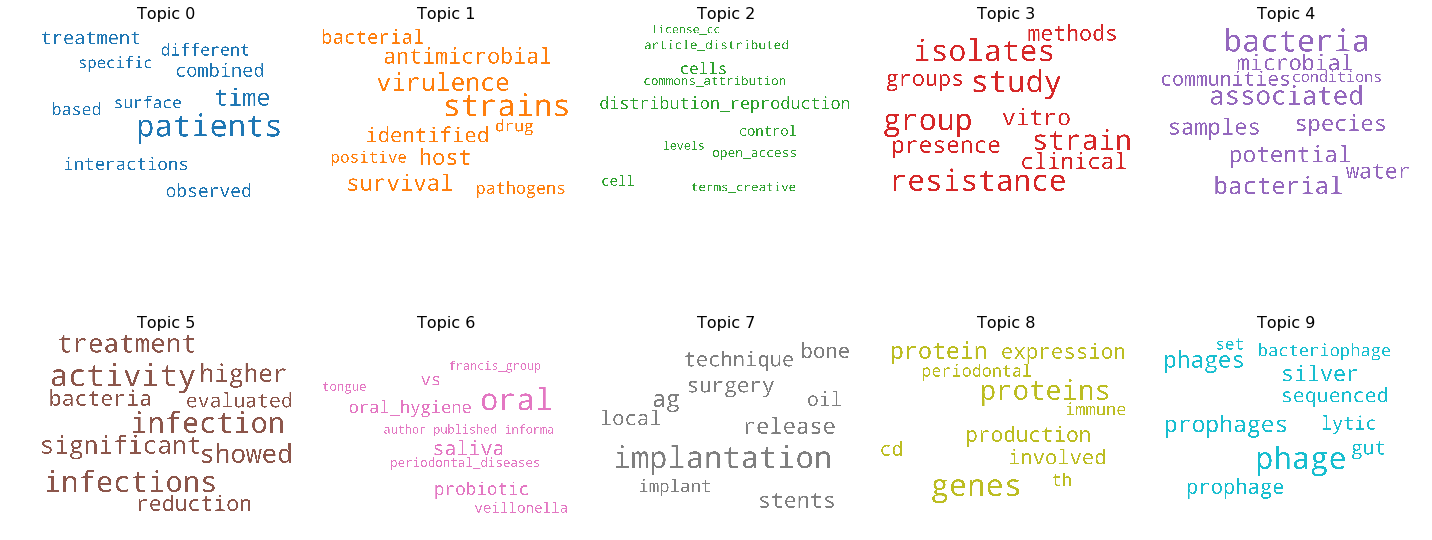

In [34]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_mlp.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [35]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model_mlp[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\color.py:103: DeprecationWarning: invalid escape sequence \(
  Regex("^rgba\(((25[0-5]|2[0-4]\d|1\d{1,2}|\d\d?)\s*,"
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\color.py:104: DeprecationWarning: invalid escape sequence \s
  "\s*?){2}(25[0-5]|2[0-4]\d|1\d{1,2}|\d\d?)\s*,"
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\color.py:105: DeprecationWarning: invalid escape sequence \s
  "\s*([01]\.?\d*?)\)"),
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\color.py:106: DeprecationWarning: invalid escape sequence \(
  Regex("^rgb\(((25[0-5]|2[0-4]\d|1\d{1,2}|\d\d?)\s*,"
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\color.py:107: DeprecationWarning: invalid escape sequence \s
  "\s*?){2}(25[0-5]|2[0-4]\d|1\d{1,2}|\d\d?)\s*?\)"),


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 643 samples in 0.004s...
[t-SNE] Computed neighbors for 643 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 643 / 643
[t-SNE] Mean sigma: 0.077154
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.531849
[t-SNE] KL divergence after 1000 iterations: 0.601286


Loading BokehJS ...

C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\container.py:103: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))
C:\Users\VDIDK\AppData\Local\Continuum\anaconda3\lib\site-packages\bokeh\core\property\container.py:103: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))


## References

https://radimrehurek.com/gensim/models/ldamodel.html

https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

https://stackoverflow.com/questions/20349958/understanding-lda-implementation-using-gensim

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/


## Notes for inspiration

https://spacy.io/universe/project/scattertext